In [11]:
import pandas as pd
import statsmodels.api as sm
import folium
import numpy as np


In [12]:
df = pd.read_csv("heatmap.csv")

In [13]:
# numerical data from this csv file is described here:

df1 = df[['NAME10', 'INTPTLAT10', 'INTPTLON10', 'Partner Count', '2019 FI Rate', '2019 FI Population', 'PublicTransportPercent', 'PovertyPercent', 'HealthInsurPercent','NonEnglishPer', 'HHMedianIncome', 'EduHSPer']]
df1.head()

,NAME10,INTPTLAT10,INTPTLON10,Partner Count,2019 FI Rate,2019 FI Population,PublicTransportPercent,PovertyPercent,HealthInsurPercent,NonEnglishPer,HHMedianIncome,EduHSPer
0,4402.02,38.856771,-77.236125,0,10.4,625,9.7,16.3,90.2,5.4,86667,16.6
1,4402.01,38.873317,-77.222164,0,9.1,282,17.1,4.7,97.1,11.4,117902,13.7
2,4506.01,38.856687,-77.208349,0,0.3,13,7.3,2.9,89.9,4.2,134531,18.4
3,4507.02,38.837091,-77.203370,2,10.0,518,16.0,19.9,66.0,33.0,60060,25.6
4,4507.01,38.843259,-77.213301,0,1.6,47,7.8,4.6,92.0,6.5,143688,14.3


In [14]:
df1.corr()

,NAME10,INTPTLAT10,INTPTLON10,Partner Count,2019 FI Rate,2019 FI Population,PublicTransportPercent,PovertyPercent,HealthInsurPercent,NonEnglishPer,HHMedianIncome,EduHSPer
NAME10,1.000000,0.066434,-0.089535,-0.187049,-0.056698,0.043658,-0.624021,-0.319963,-0.266812,0.132983,0.002437,0.205102
INTPTLAT10,0.066434,1.000000,0.210002,-0.037024,-0.075325,-0.066196,0.076407,-0.013690,0.049272,0.142474,0.023027,-0.164746
INTPTLON10,-0.089535,0.210002,1.000000,0.298223,0.474387,0.371631,0.414847,0.246564,-0.001019,-0.088487,-0.318693,0.315073
Partner Count,-0.187049,-0.037024,0.298223,1.000000,0.421262,0.391996,0.317855,0.439873,-0.085903,0.041862,-0.382492,0.393400
2019 FI Rate,-0.056698,-0.075325,0.474387,0.421262,1.000000,0.846898,0.332018,0.705489,-0.148119,-0.030292,-0.711250,0.708425
2019 FI Population,0.043658,-0.066196,0.371631,0.391996,0.846898,1.000000,0.203752,0.598537,-0.240013,0.060594,-0.649567,0.607217
PublicTransportPercent,-0.624021,0.076407,0.414847,0.317855,0.332018,0.203752,1.000000,0.445927,0.103261,-0.023003,-0.310355,0.051200
PovertyPercent,-0.319963,-0.013690,0.246564,0.439873,0.705489,0.598537,0.445927,1.000000,-0.283187,0.223300,-0.634933,0.518259
HealthInsurPercent,-0.266812,0.049272,-0.001019,-0.085903,-0.148119,-0.240013,0.103261,-0.283187,1.000000,-0.738061,0.489524,-0.378710
NonEnglishPer,0.132983,0.142474,-0.088487,0.041862,-0.030292,0.060594,-0.023003,0.223300,-0.738061,1.000000,-0.353436,0.118902


In [15]:
VarY = df[["Partner Count"]] #dependent variable
VarX = sm.add_constant(df[['2019 FI Rate', '2019 FI Population', 
                            'PublicTransportPercent', 'PovertyPercent', 
                            'HealthInsurPercent','NonEnglishPer', 
                            'HHMedianIncome', 'EduHSPer']])

model = sm.OLS(VarY, VarX).fit()
print(df[['2019 FI Rate', '2019 FI Population', 'PublicTransportPercent', 'PovertyPercent', 'HealthInsurPercent','NonEnglishPer', 'HHMedianIncome', 'EduHSPer']].corr)
print(model.summary())

<bound method DataFrame.corr of       2019 FI Rate  2019 FI Population  PublicTransportPercent  \
0             10.4                 625                     9.7   
1              9.1                 282                    17.1   
2              0.3                  13                     7.3   
3             10.0                 518                    16.0   
4              1.6                  47                     7.8   
...            ...                 ...                     ...   
1043           7.9                 355                    35.8   
1044           4.1                 138                    25.7   
1045           4.8                 287                    18.3   
1046           5.6                 127                     5.9   
1047           3.2                 204                     5.7   

      PovertyPercent  HealthInsurPercent  NonEnglishPer  HHMedianIncome  \
0               16.3                90.2            5.4           86667   
1                4.7     

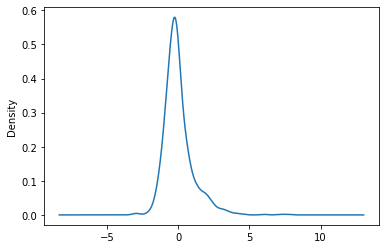

In [16]:
model.resid.plot.kde()

In [31]:
residuals_name = pd.concat([df1[['NAME10', 'INTPTLAT10' ,'INTPTLON10']], model.resid], axis=1)
residuals_name.sort_values(by=[0])

residuals_name.to_csv('residuals.csv')

# Plotting outliers on folium map

In [29]:
# using folium to generate base map in greater DC area

def generateBaseMap(default_location=[38.9072, -77.0369], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()

# loading in CAFB distribution data
for idx, row in residuals_name.iterrows():
    if(abs(row[0]) > 2):
        c = '#DC143C'
        if row[0] > 0:
            c = '#003366'
            
        lat = float(row['INTPTLAT10'])
        long = float(row['INTPTLON10'])
        folium.CircleMarker( location=[ lat, long ], color=c, radius=2 ).add_to( base_map )

base_map

In [19]:
logdf = df
logdf['CFAB_existence'] = logdf.apply(lambda row: 1 if row['Partner Count'] > 0 else 0, axis=1)

n_VarY = logdf["CFAB_existence"]

LogModel = sm.Logit(n_VarY, VarX).fit()
LogModel.summary()

Optimization terminated successfully.
         Current function value: 0.556899
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         CFAB_existence   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.1729
Time:                        17:04:33   Log-Likelihood:                -583.63
converged:                       True   LL-Null:                       -705.64
Covariance Type:            nonrobust   LLR p-value:                 3.189e-48
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.0465      1.684     -1.809      0.070      -6.347       0.254
2019 FI Rate              -0.0608      0.024     -2.543      0.011      -0.108      -0.014
2019 FI Population         0.0013      0.000      3.180      0.001       0.001       0.002
PublicTransportPercent     0.0395      0.006      6.458      0.000       0.028       0.052
PovertyPercent             0.0240      0.015      1.586      0.113      -0.006       0.054
HealthInsurPercent         0.0099      0.017      0.583      0.560      -0.023       0.043
NonEnglishPer              0.0111      0.017      0.648      0.517      -0.022       0.045
HHMedianIncome         -4.574e-06   3.22e-06     -1.421      0.155   -1.09e-05    1.73e-06
EduHSPer                   0.0659      0.011      5.891      0.000       0.044       0.088
==========================================================================================
"""